In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [0]:
df = pd.read_csv('az_12_17_merged.csv')
df.head()

,Unnamed: 0,state,id,county,newspaper,date,notice_id,count_tags,combinations,combinations_clean,...,DOMESTIC_MIG,NET_MIG,RESIDUAL,GQ_ESTIMATES,R_birth,R_death,R_NATURAL_INC,R_INTERNATIONAL_MIG,R_DOMESTIC_MIG,R_NET_MIG
0,0,Arizona,36/182013_19773396,Maricopa,West Valley View (Maricopa County),2013-01-08 00:00:00,19773396.0,1,1-AOO,1-AOO,...,31023.0,39071.0,228.0,56449.0,13.748913,6.894718,6.854195,2.025652,7.808376,9.834028
1,1,Arizona,36/182013_19773397,Maricopa,West Valley View (Maricopa County),2013-01-08 00:00:00,19773397.0,1,1-AOO,1-AOO,...,31023.0,39071.0,228.0,56449.0,13.748913,6.894718,6.854195,2.025652,7.808376,9.834028
2,2,Arizona,36/182013_19773398,Maricopa,West Valley View (Maricopa County),2013-01-08 00:00:00,19773398.0,2,1-AOD_Board,1-AOD,...,31023.0,39071.0,228.0,56449.0,13.748913,6.894718,6.854195,2.025652,7.808376,9.834028
3,3,Arizona,36/182013_19773389,Maricopa,West Valley View (Maricopa County),2013-01-08 00:00:00,19773389.0,4,1-Bids_Contractor_Meeting_Proposal,1-Bids_2-Procuring Services,...,31023.0,39071.0,228.0,56449.0,13.748913,6.894718,6.854195,2.025652,7.808376,9.834028
4,4,Arizona,36/182013_19773390,Maricopa,West Valley View (Maricopa County),2013-01-08 00:00:00,19773390.0,1,1-AOO,1-AOO,...,31023.0,39071.0,228.0,56449.0,13.748913,6.894718,6.854195,2.025652,7.808376,9.834028


In [0]:
df['count']=df.groupby(['county','combinations_clean','year','month']).combinations_clean.transform('count')

In [0]:
print(len(df))
df.drop_duplicates(['county','notice_id'],inplace=True)
print(len(df))
df['year']

In [0]:
df['count_pop'] = df['count']*10000/df['POP_ESTIMATE']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


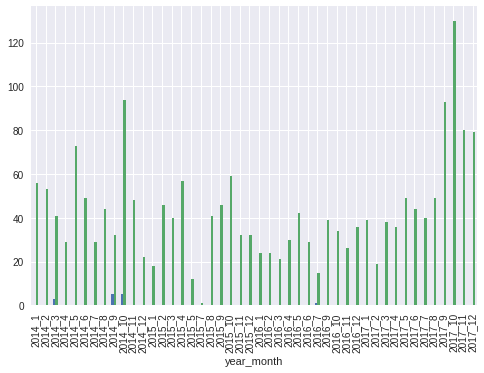

In [0]:
# temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

# temp_df = temp_df[temp_df['county'].isin(['Carson','Douglas','Churchill'])]

temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')

# pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
#                     values='count', aggfunc='count')

day_order = ['2014_1', '2014_2', '2014_3', '2014_4', '2014_5', '2014_6', '2014_7', '2014_8', '2014_9', '2014_10', '2014_11', '2014_12',
            '2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']
ax = pv.reindex(day_order).plot(kind="bar", legend=False)
# plt.axvspan(9, 14, color='red', alpha=0.5)
plt.show()
# plt.plot(pv)
# print(pv)

year    2013   2014    2015    2016    2017
month                                      
1      127.0  473.0   377.0   241.0   261.0
2      148.0  190.0   168.0   305.0   588.0
3       86.0  275.0   469.0   308.0  1701.0
4      452.0  425.0   303.0  1336.0   536.0
5      558.0  425.0   382.0   188.0    31.0
6      156.0  408.0     NaN   736.0  2143.0
7      349.0  340.0    10.0   771.0   730.0
8       44.0   32.0    88.0     NaN   674.0
9      136.0  100.0    91.0   202.0   989.0
10     223.0  123.0   195.0   189.0   104.0
11     425.0  275.0   671.0   216.0   568.0
12     296.0   86.0  1706.0   209.0   451.0


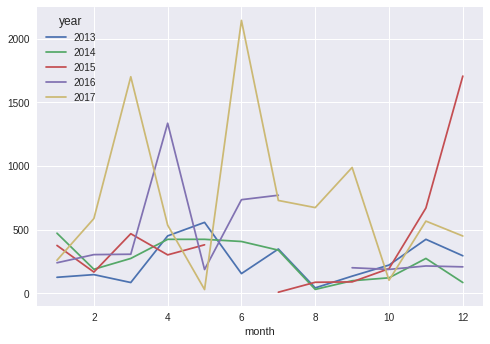

In [0]:
temp_df = df
temp_df = df[df['combinations_clean'].isin(['Contractor',
 'Construction_Contractor','Construction_Council','Construction'])]
pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                    values='count', aggfunc='sum')

pv.plot()
print(pv)

In [0]:
temp_df = df[df['combinations_clean'].isin(['Contractor',
 'Construction_Contractor','Construction_Council','Construction'])]

scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

temp_df_m = temp_df[temp_df['county'].isin(['Maricopa'])]
temp_df_p = temp_df[temp_df['county'].isin(['Pima'])]
# pv = pd.pivot_table(temp_df, index=temp_df.year,
#                     values='count', aggfunc='sum')
# pv.plot()
# print(pv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


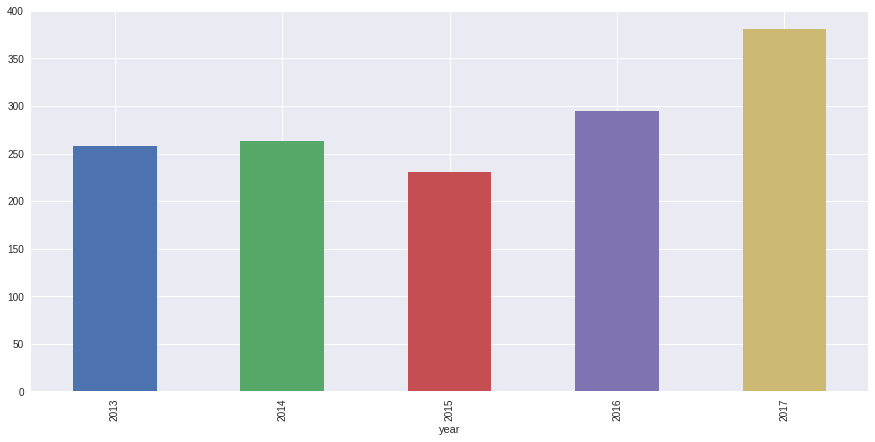

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
m = temp_df_m.groupby(['year']).count()['count_pop']
m.plot(ax=ax, kind='bar')

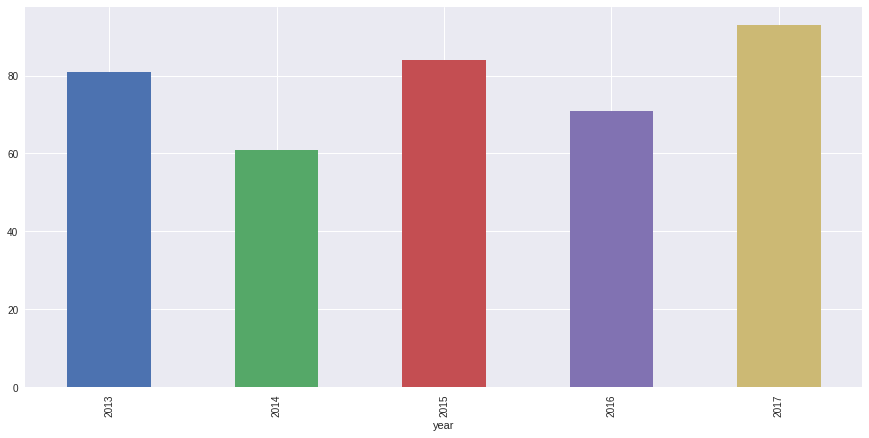

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
p = temp_df_p.groupby(['year']).count()['count_pop']
p.plot(ax=ax, kind='bar')


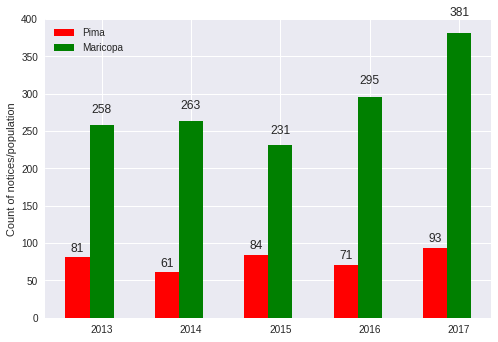

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = m
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Count of notices/population')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2013', '2014', '2015','2016','2017') )
ax.legend( (rects1[0], rects2[0]), ('Pima', 'Maricopa') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


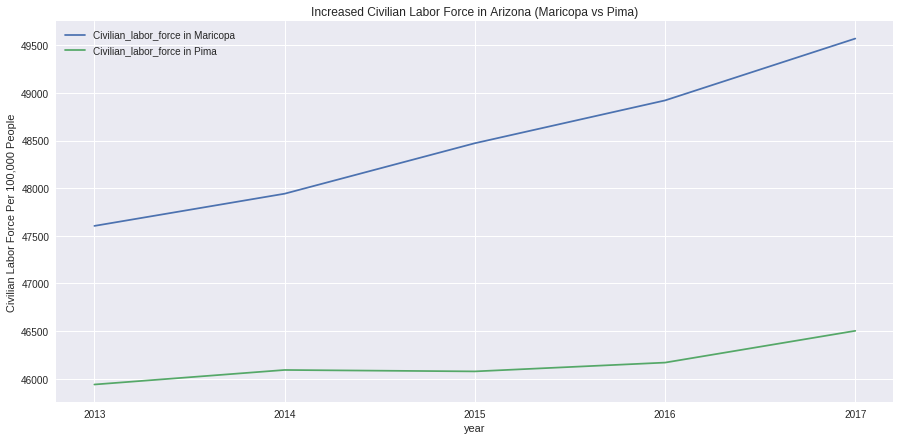

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([2013,2014,2015,2016,2017],['2013','2014','2015','2016','2017'])
temp_df_m['labor_pop'] = temp_df_m['Civilian_labor_force']*100000/temp_df_m['POP_ESTIMATE']
m = temp_df_m.groupby(['year']).mean()['labor_pop']
m.plot(ax=ax, kind='line',label='Civilian_labor_force in Maricopa')

temp_df_p['labor_pop'] = temp_df_p['Civilian_labor_force']*100000/temp_df_p['POP_ESTIMATE']
p = temp_df_p.groupby(['year']).mean()['labor_pop']
plt.ylabel("Civilian Labor Force Per 100,000 People")
p.plot(ax=ax, kind='line',label='Civilian_labor_force in Pima')
plt.title("Increased Civilian Labor Force in Arizona (Maricopa vs Pima)")
plt.legend(loc='best')

In [0]:
counties = ['Maricopa', 'Pima'] 
years = [2013,2014,2015,2016,2017]
annualLaborForceDelta = {county:{} for county in counties}

for county in counties:
  countyDf = temp_df[temp_df['county'].isin([county])]
  countyDf['labor_pop'] = (countyDf['Civilian_labor_force']/countyDf['POP_ESTIMATE'])*100000
  laborPopAnnual = countyDf.groupby(['year']).mean()['labor_pop']
  for i, year in enumerate(years):
    if i == 0:
      continue
    annualLaborForceDelta[county][year] = (laborPopAnnual[year] - laborPopAnnual[years[i-1]])
print(annualLaborForceDelta)

{'Maricopa': {2014: 337.8744948099411, 2015: 529.628349552353, 2016: 449.22783236015675, 2017: 648.839316285841}, 'Pima': {2014: 152.4067536773582, 2015: -14.950415461738885, 2016: 92.46777915755956, 2017: 333.2683237839083}}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


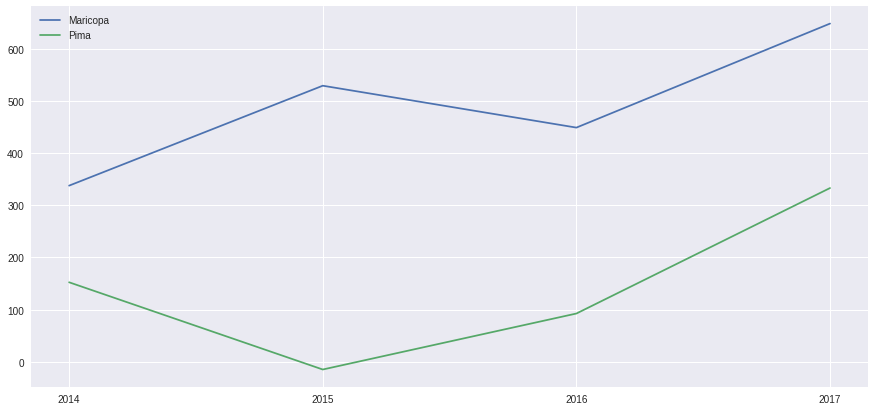

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([2013,2014,2015,2016,2017],['2013','2014','2015','2016','2017'])

for county in counties:
  lists = sorted(annualLaborForceDelta[county].items())
  x, y = zip(*lists)
  plt.plot(x, y, label=county)
  
plt.legend(loc='best')